| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github repo for more information: https://github.com/edgi-govdata-archiving/ECHO-COVID19
#### The notebook was collaboratively authored by EDGI following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

# Use the region.db SQLite database to look up data on regions

This notebook uses the region.db database that is part of the EEW Congressional Report Card generation process.  It gives the user the opportunity to look into the information collected in that database, in ways that may not be a part of our current report cards.

## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# **Let's begin!**

Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.

These first two cells give us access to some external Python code we will need.

### 1.  Bring in some code that is stored in a Github project.
These two github repositories hold Python code that the notebook uses.
* ECHO_modules holds code that can be used in this and other notebooks--the DataSet class, the make_data_sets() function, etc.
* The ECHO-Cross-Program repository is the one this notebook is contained in.  We clone it to be able to use the utilities.py file contained in it.

In [ ]:
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git
print("Done!")

### 2.  Import the Region class
This class represents a particular region--a state or congressional district or the entire nation. It is constructed with these attributes.

    Attributes
    ----------
    type : str
        One of the supported region types--'State',
        'Congressional District'    
    value : str
        The actual identifier of the region--e.g. the number of
        the congressional district, omit for states    
    state : str
        The two letter state abbreviation    
    programs : str
        The EPA programs


In [ ]:
from Region import Region

programs = ['CAA', 'CWA', 'RCRA']

### 3. Begin using functions available through the Region class
    def get_per_1000( type, region, year ):
    def get_cwa_per_1000( year ):
    def get_recurring_violations( program ):
    def get_inflation( base_year ):
    def get_events( type, program, base_year ):
    def get_non_compliants( program ):
    def get_active_facilities( program, table='active_facilities' ):

These examples get the violations per 1000 facilities for the total USA and the selected state.

In [ ]:
this_state = 'NY'
region = Region( type='State', state=this_state,
                programs=programs )

df = region.get_per_1000( 'violations', 'USA', 2020 )
print( "USA violations" )
print(df)
df = region.get_per_1000( 'violations', 'State', 2020 )
print( "State violations - {}".format(this_state) )
print(df)

### 4.  Loop through all states and get violations per 1000 facilities for each

In [ ]:
import pandas as pd
from ECHO_modules.geographies import states

all_df = pd.DataFrame( columns=['State', 'Program', 'Per1000'] )
for this_state in states:
    region = Region( type='State', state=this_state,
                programs=programs )
    df = region.get_per_1000( 'violations', 'State', 2020 )
    df.insert( 0, 'State', this_state )
    all_df = all_df.append( df, ignore_index=True )
    # print( "State violations - {}".format(this_state) )
    # print(df)
print( all_df )
all_df.to_json( 'state_violations.json', orient='records' )
all_df.to_csv( 'state_violations.csv')

### 4.  Loop through all CDs and get violations per 1000 facilities for each

In [ ]:
import pandas as pd

def get_cd( row ):
    region = Region( type='Congressional District', state=row[1].state, value=row[1].cd,
                programs=programs )
    df = region.get_per_1000( type='violations', region='CD', year=2020 )
    df.insert( 0, 'State', row[1].state )
    df.insert( 1, 'CD', row[1].cd )
    return df

region = Region( type='None' )
all_cds = region.get_cds()

all_df = pd.DataFrame( columns=['State', 'CD', 'Program', 'Per1000'] )
for row in all_cds.iterrows():
    df = get_cd( row )
    # breakpoint()
    all_df = all_df.append( df, ignore_index=True )
all_df.to_json( 'cd_violations.json', orient='records' )
all_df.to_csv( 'cd_violations.csv' )

## This section lets us graph inspections, violations, enforcements and fines per facility over time



### Get the events per facility for all years 2001 to 2021 for 

1. all of the US--all CDs in the database.
2. the chosen state
3. the chosen CD (if there is one)

### 5. Select states or congressional district

In [1]:
from ECHO_modules.utilities import show_region_type_widget, \
    show_state_widget, show_pick_region_widget

region_type_widget = show_region_type_widget( 
    region_types=['Congressional District', 'State'], default_value='Congressional District')
state_widget = None
# display( region_type_widget )

Dropdown(description='Region of interest:', options=('Congressional District', 'State'), style=DescriptionStyl…

In [2]:
state_widget = show_state_widget( multi=True )

SelectMultiple(description='States:', options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA…

In [3]:
region_widget = None
region_type = region_type_widget.value
if ( region_type != 'State' ):
    region_widget = show_pick_region_widget( type=region_type,
                                           state_widget=state_widget, multi=False )

Dropdown(description='District:', options=(1, 2, 3, 4, 5, 6, 7, 8), value=1)

In [7]:
states = state_widget.value if state_widget is not None else None
region_selected = None
if ( region_type != 'State' ):
    region_selected = region_widget.value


### 6. Select CWA, CAA or RCRA

In [5]:
import ipywidgets as widgets

program_widget=widgets.Dropdown(
    options=['RCRA', 'CAA', 'CWA'],
    description='Program:',
    disabled=False,
) 
display(program_widget)


Dropdown(description='Program:', options=('RCRA', 'CAA', 'CWA', 'SDWA'), value='RCRA')

### 7. Create the graphs

<AxesSubplot:xlabel='Year', ylabel='fines per facility'>

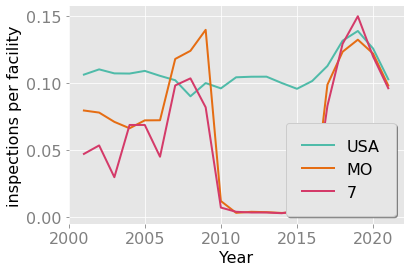

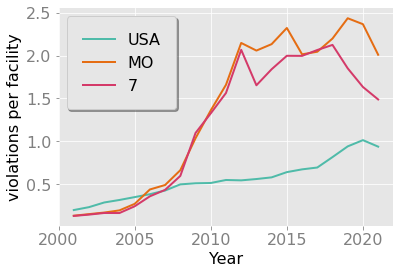

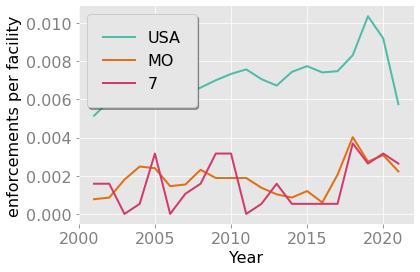

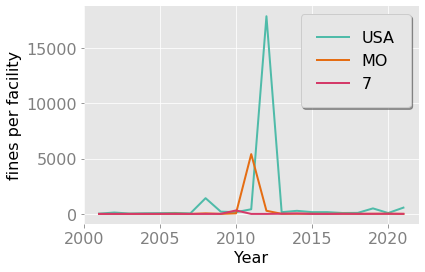

In [8]:
import pandas as pd
from Region import Region

def create_df( data_type, y_field ):
    usa_region = Region( type='Nation' )
    usa_num_facs = usa_region.get_active_facilities( program )
    usa_events = usa_region.get_events( data_type, program, 2021 )
    usa_events['USA'] = usa_events[y_field]/usa_num_facs

    state_events_dict = {}
    for state in states:
        state_region = Region( type='State', state=state, 
                    programs=[program,] )
        state_num_facs = state_region.get_active_facilities( program )
        state_events = state_region.get_events( data_type, program, 2021 )
        state_events[ state ] = state_events[y_field]/state_num_facs
        state_events_dict[ state ] = state_events

    if ( region_type != 'State' ):
        local_region = Region( type=region_type, state=states[0], value=region_selected,
                             programs=[program,])
        local_num_facs = local_region.get_active_facilities( program )
        local_events = local_region.get_events( data_type, program, 2021 )
        local_events[ region_selected ] = local_events[y_field]/local_num_facs

    df_events = usa_events.drop( y_field, 1 )
    for state_name,state_events in state_events_dict.items():
        df_events = df_events.merge( state_events[['Year',state_name]] )
    if ( region_type != 'State' ):
        df_events = df_events.merge( local_events[['Year',region_selected]])
    return df_events

program = program_widget.value

df_events = create_df( 'inspections', 'Count' )
ylabel = '{} per facility'.format( 'inspections' )
df_events.plot.line( x='Year', ylabel=ylabel )

df_events = create_df( 'violations', 'Count' )
ylabel = '{} per facility'.format( 'violations' )
df_events.plot.line( x='Year', ylabel=ylabel )

df_events = create_df( 'enforcements', 'Count' )
df_events = df_events.drop( 'Amount', 1)
ylabel = '{} per facility'.format( 'enforcements' )
df_events.plot.line( x='Year', ylabel=ylabel )

df_events = create_df( 'enforcements', 'Amount' )
df_events = df_events.drop( 'Count', 1)
ylabel = '{} per facility'.format( 'fines' )
df_events.plot.line( x='Year', ylabel=ylabel )

